# <center> Практические задания по цифровой обработке сигналов </center> <a class="tocSkip">
# <center> Первая лабораторная работа </center> <a class="tocSkip">


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл) <a class="tocSkip">

## Теория <a class="tocSkip">

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from random import choice
from IPython import display
import scipy
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? <a class="tocSkip">

WAV-формат используется для хранения данных оцифрованных аудиосигналов. WAV-файлы содержат две области: *заголовок файла* (хранит информацию о размере файла, количестве каналов, частоте дискретизации, параметрах квантования) и *область данных*.

В заголовке за параметры дискретизации отвечает поле `sampleRate` (4 байта), за квантование - поле `bitsPerSample` (2 байта) - количество бит в сэмпле (последовательность бит, описывающая амплитуду волны в момент времени), так называемая "глубина" звучания.

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь? <a class="tocSkip">

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [2]:
# Загрузка аудио-файла
audio_array, sample_rate = librosa.load('resources/audio.wav')
print('sample rate: ', sample_rate)

sample rate:  22050


In [3]:
print('shape audio data: ', audio_array.shape)

shape audio data:  (65856,)


In [4]:
# Воспроизвести аудио
ipd.Audio(audio_array, rate=sample_rate)

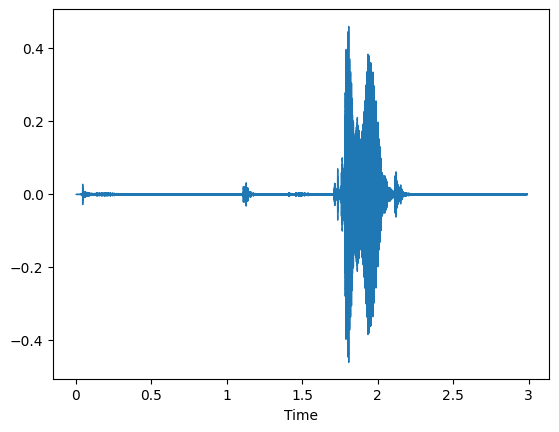

In [5]:
# Отрисовка формы волны сигнала
librosa.display.waveshow(audio_array, sr=sample_rate);

rate: 44100


rate: 34100


rate: 24100


rate: 14100


rate: 4100


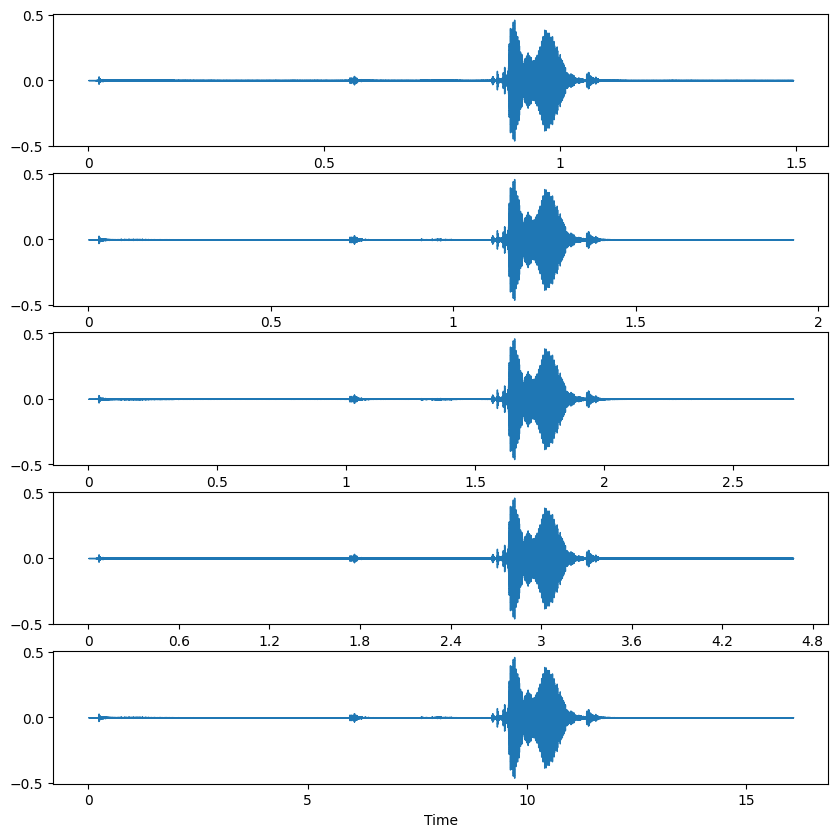

In [14]:
_, ax = plt.subplots(len(range(2 * sample_rate, 3000, -10_000)), 1, figsize=(10, 10), sharey=True, sharex=False)
for i, rate in enumerate(range(2 * sample_rate, 3000, -10_000)):
    print(f'rate: {rate}')
    display(ipd.Audio(audio_array, rate=rate))
    librosa.display.waveshow(audio_array, sr=rate, ax=ax[i]);

*Видно, что при изменении частоты дискретизации изменяется время воспроизведения, что не удивительно, так как меняется количество отсчетов, обрабатываемых в единицу времени (в то же время, форма звуковой волны не меняется - проверено). При частотах больше 80_000 Гц и меньше 4_500 Гц человеческая речь становиться неразборчивой*

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? <a class="tocSkip">

`MP3`, в отличии от `WAV`, предполагает запись звука со сжатием. Битрейт (интенсивность воспроизведения звукового потока) у WAV фиксированный и более высокий, однако звуковые файлы, формируемые последним, относительно большого размера. Формат `OGG` также сжимает аудио с потерями качества. Таким образом, формат `WAV` позволяет получить самое честное качество звучания.

# Задание 2. Гармонические сигналы (1 балл) <a class="tocSkip">

## Теория <a class="tocSkip">
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [34]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [35]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика <a class="tocSkip">

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a*** <a class="tocSkip">

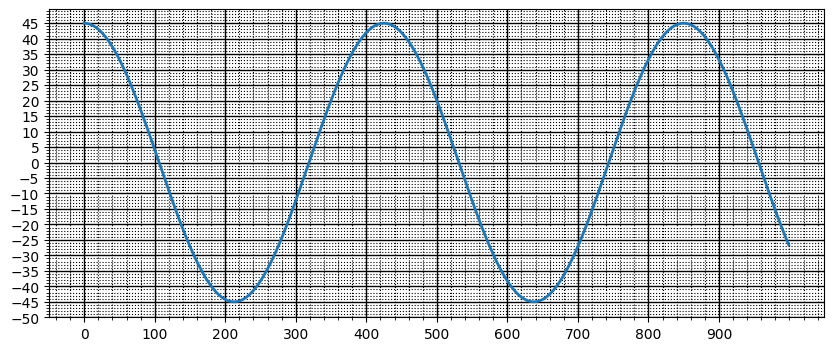

In [36]:
draw_signal(test_data['task2']['a'], figsize=(10, 4));

In [37]:
a = 45 * np.cos(2 * np.pi / (2 * (212.5)) * np.arange(0, 1000, 1) + 0)

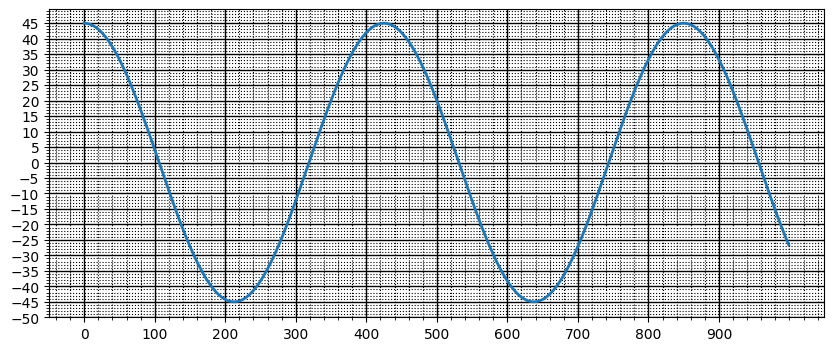

In [38]:
draw_signal(a, figsize=(10, 4));

In [39]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= $ $45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) =$ $\frac{2 \pi}{425} $

3. Фаза - $\phi= $ $0$

### Сигнал ***b*** <a class="tocSkip">

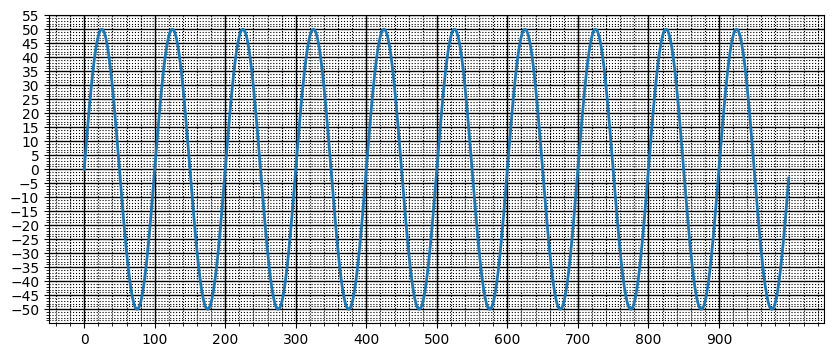

In [40]:
draw_signal(test_data['task2']['b'], figsize=(10, 4))

In [41]:
b = 50 * np.sin(2 * np.pi / 100 * np.arange(0, 1000, 1) + 0)

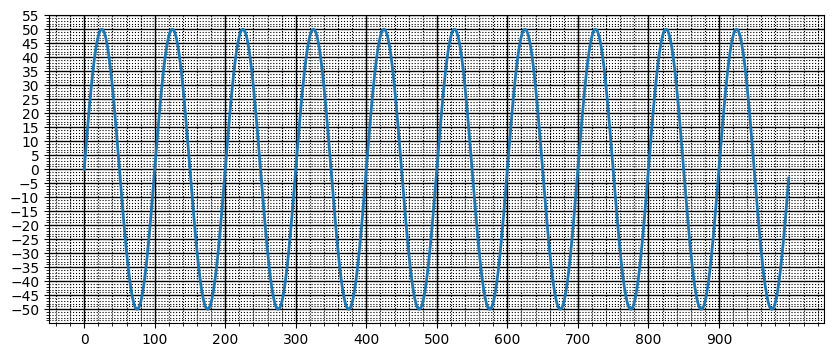

In [42]:
draw_signal(b, figsize=(10, 4))

In [43]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= $ 50

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $ $\frac{2\pi}{100}$

3. Фаза - $\phi= $ 0

### Сигнал ***c*** <a class="tocSkip">

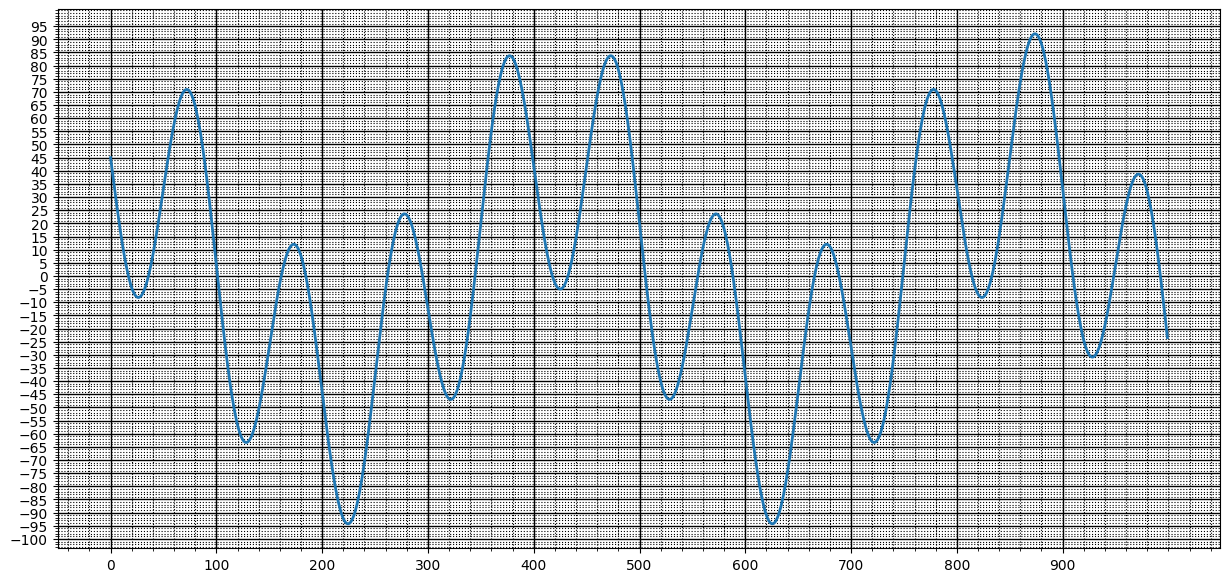

In [44]:
draw_signal(test_data['task2']['c'], figsize=(15, 7))

In [45]:
c = - 50 * np.sin(2 * np.pi / 100 * np.arange(0, 1000, 1) + 0) + 45 * np.cos(2 * np.pi / 425 * np.arange(0, 1000, 1) + 0)

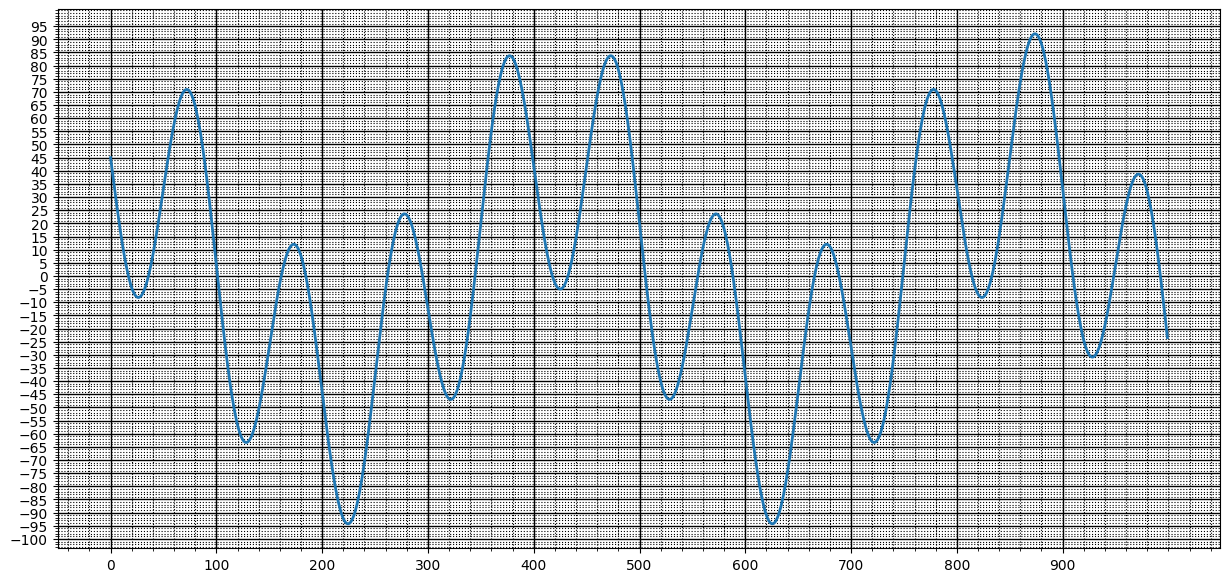

In [49]:
draw_signal(c, figsize=(15, 7))

Видно, что сигнал является просто суммой двух гармоник $a - b$

In [50]:
assert len(c)== 1000
assert np.allclose(a - b, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла) <a class="tocSkip">

## Теория <a class="tocSkip">
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

![Convolution](resources/convolution.gif "Convolution")
<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика <a class="tocSkip">
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [51]:
def convolve(in1, in2):
    # представим из сигналов в качестве "ядра" и посчитаем длину
    kernel_n = len(in2)
    # дополним исходный сигнал слева нулями
    in1 = np.pad(in1, kernel_n - 1)
    signal_n = len(in1)
    # выполним свертку сигнала с ядром по определению
    res = np.array([in1[i - kernel_n: i] @ in2[::-1]
                     for i in range(kernel_n, signal_n + 1)])
    return res

In [52]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [53]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [54]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b <a class="tocSkip">

Сигнал **а**

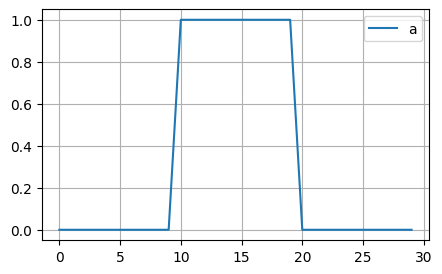

In [55]:
plt.figure(figsize=(5, 3))
plt.plot(a, label='a')
plt.grid()
plt.legend();

Сигнал **b**

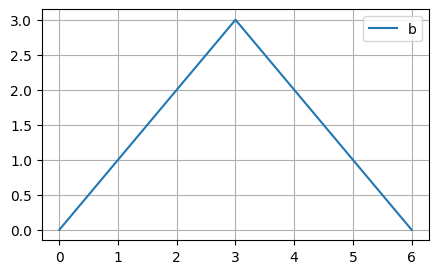

In [56]:
plt.figure(figsize=(5, 3))
plt.plot(b, label='b')
plt.grid()
plt.legend();

Свертка **a** и **b**

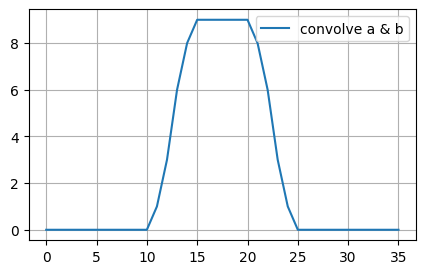

In [57]:
plt.figure(figsize=(5, 3))
plt.plot(convolve(a, b), label='convolve a & b')
plt.grid()
plt.legend();

Все 3 графика на одной картинке:

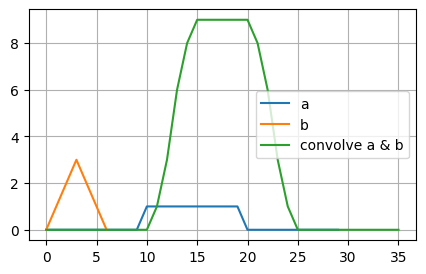

In [58]:
plt.figure(figsize=(5, 3))
plt.plot(a, label='a')
plt.plot(b, label='b')
plt.plot(convolve(a, b), label='convolve a & b')
plt.grid()
plt.legend();

# Задание 4. * Алгоритм Карплуса-Стронга  <a class="tocSkip">

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [65]:
def karplus_strong(noise, N):
    # генерируется результирующий массив, 
    # который содержит короткий сигнал длиной len(noise)
    out = np.concatenate((noise, np.zeros(N - len(noise))))
    delay = len(noise)
    samples_n = len(out)
    # последовательно подаем сигнал на выход и на вход линии задержки 
    # длиной len(noise) отсчетов
    for i in range(delay, samples_n):
        # реализация фильтра
        out[i] = out[i - delay] * 1/2 + out[i - delay - 1] * 1/2
    return out

In [66]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


### Попробуем покрутить параметры генерации <a class="tocSkip">

В качестве параметров генерации выступают `sample_rate`, `frequency`, `sec`. Будем изменять последовательно `frequency`, чтобы получать гитарные ноты.

Сгенерируем гитарные ноты:

In [67]:
def generate_audio(frequency=82.41, sec=2):
    np.random.seed(seed=1)
    sample_rate = 44100 
    frequency = frequency
    sec = sec
    gen_len = sample_rate * sec
    noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency)))
    gen_wav = karplus_strong(noise, gen_len)
    return gen_wav, sample_rate

gen_wav, sample_rate = generate_audio(110.00, 3)
ipd.Audio(gen_wav, rate=sample_rate)

In [68]:
freqs = {
    'e (ми первой октавы)': 329.63,
    'B (си малой октавы)': 246.94,
    'G (соль малой октавы)': 196.00,
    'D (ре малой октавы)': 146.83,
    'Aб (ля большой октавы)': 110.00,
    'Eб (ми большой октавы)': 82.41
}

for k, v in freqs.items():
    print(k)
    gen_wav, sample_rate = generate_audio(v, 2)
    display(ipd.Audio(gen_wav, rate=sample_rate))

e (ми первой октавы)


B (си малой октавы)


G (соль малой октавы)


D (ре малой октавы)


Aб (ля большой октавы)


Eб (ми большой октавы)


In [69]:
# Попробуем сгенерировать последовательность нот длиной 1 с
wav_res = np.empty(0)
for _ in range(9):
    fr = choice(list(freqs.values()))
    _gen, sample_rate = generate_audio(fr, 1)
    wav_res = np.concatenate((wav_res, _gen))
display(ipd.Audio(wav_res, rate=sample_rate))

Визуализируем затухание амплитуды:

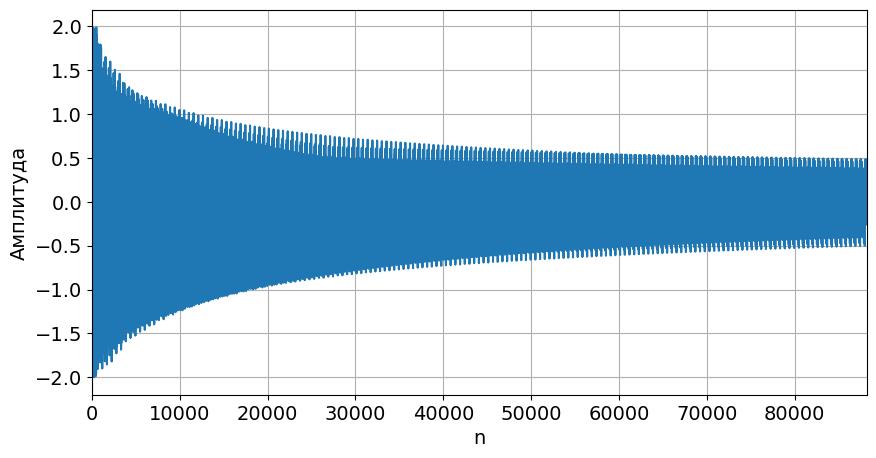

In [70]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

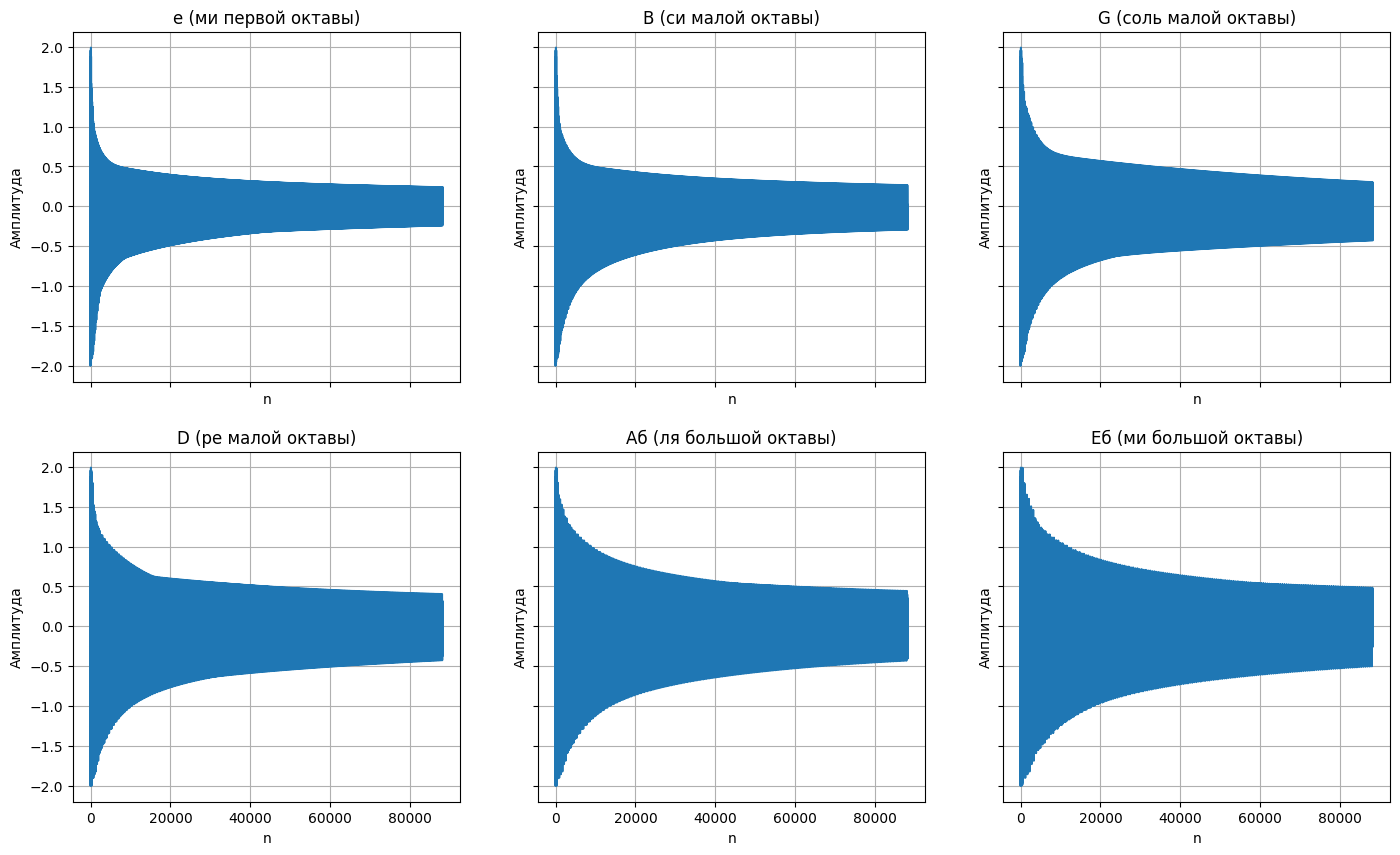

In [71]:
_, ax = plt.subplots(2, 3, figsize=(17, 10), sharey=True, sharex=True)

for i, (k, v) in enumerate(freqs.items()):
    gen_wav, sample_rate = generate_audio(v, 2)
    ax[i // 3, i % 3].plot(gen_wav)
    ax[i // 3, i % 3].set_title(k)
    ax[i // 3, i % 3].set_ylabel('Амплитуда')
    ax[i // 3, i % 3].set_xlabel('n')
    ax[i // 3, i % 3].grid()